# Лабораторная работа №6: Градиентный бустинг

## Выполнил студент группы 6133-010402D Читоркин Егор Евгеньевич

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать категориальные и количественные признаки.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

2. Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

   - Привести описание датасета.

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|Price|Цена|Рубли|
|Apartment type|Тип|Первичное/вторичное|
|Metro station|Ближайшая станция метро|-|
|Minutes to metro|Время до ближайшей станции|Минуты|
|Region|Область|-|
|Number of rooms|Количество комнат|-|
|Area|Площадь|кв. м|
|Living area|Жилая площадь|кв. м|
|Kitchen area|Площадь кухни|кв. м|
|Floor|Этаж|-|
|Number of floors|Количество этажей в доме|-|
|Renovation|Внутренная отделка|-|

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


Данные уже готовы

   - Нормализовать численные данные.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
numeric = [data.columns[i] for i in range(data.shape[1]) if data.dtypes[data.columns[i]] != 'object']
numeric

['Price',
 'Minutes to metro',
 'Number of rooms',
 'Area',
 'Living area',
 'Kitchen area',
 'Floor',
 'Number of floors']

In [6]:
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,-0.360057,Secondary,Опалиха,-0.949114,Moscow region,-0.684669,-0.605069,-0.719189,-0.529779,2.094025,0.863466,Cosmetic
1,-0.327458,Secondary,Павшино,-1.593826,Moscow region,-0.684669,-0.333009,-0.485737,-0.335677,-0.422588,-0.159125,European-style renovation
2,-0.302224,Secondary,Мякинино,0.340311,Moscow region,-0.684669,-0.398830,-0.585413,0.065466,0.107226,0.863466,Cosmetic
3,-0.335910,Secondary,Строгино,-0.626758,Moscow region,-0.684669,-0.539248,-0.590659,-0.206276,0.372132,1.681539,European-style renovation
4,-0.358246,Secondary,Опалиха,-0.949114,Moscow region,-0.684669,-0.501218,-0.611644,-1.112084,-0.555041,-1.181716,Without renovation


   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

In [7]:
X, y = data.drop(['Apartment type'], axis=1), data['Apartment type']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train_no_code, X_test_no_code, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(15873,) (6803,)


Создадим словари для LabelEncoding

In [10]:
keys, values = pd.factorize(X['Metro station'].unique())
d_station = dict(zip(values, keys))
keys, values = pd.factorize(y.unique())
d_ap = dict(zip(values, keys))
keys, values = pd.factorize(X['Region'].unique())
d_reg = dict(zip(values, keys))
keys, values = pd.factorize(X['Renovation'].unique())
d_ren = dict(zip(values, keys))

In [11]:
X_train_code, X_test_code = X_train_no_code.copy(), X_test_no_code.copy()

In [12]:
X_train_code['Metro station'] = X_train_code['Metro station'].replace(d_station)
X_train_code['Region'] = X_train_code['Region'].replace(d_reg)
X_train_code['Renovation'] = X_train_code['Renovation'].replace(d_ren)

X_test_code['Metro station'] = X_test_code['Metro station'].replace(d_station)
X_test_code['Region'] = X_test_code['Region'].replace(d_reg)
X_test_code['Renovation'] = X_test_code['Renovation'].replace(d_ren)

C:\Users\79372\AppData\Local\Temp\ipykernel_13764\1709547021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_code['Metro station'] = X_train_code['Metro station'].replace(d_station)
C:\Users\79372\AppData\Local\Temp\ipykernel_13764\1709547021.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_code['Region'] = X_train_code['Region'].replace(d_reg)
C:\Users\79372\AppData\Local\Temp\ipykernel_13764\1709547021.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

3. Для каждого из классификаторов ($AdaBoost$, $GradientBoostingClassifier$, $XGBoost$, $CatBoost$):
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).
   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
   - Итого получить 6 обученных моделей.
   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).
   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
import numpy as np

In [31]:
ada_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.05),
}

ada_model = AdaBoostClassifier(algorithm="SAMME")

ada_search = GridSearchCV(ada_model, ada_grid, cv=3)
ada_search.fit(X_train_code, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51]),
                         'n_estimators': range(10, 101, 10)})

In [40]:
ada_search.best_params_

{'learning_rate': 0.51, 'n_estimators': 100}

In [32]:
grad_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.1),
    'max_depth': range(1, 6),
}

grad_model = GradientBoostingClassifier()

grad_search = GridSearchCV(
    grad_model, grad_grid, cv = 3)

grad_search.fit(X_train_code, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51]),
                         'max_depth': range(1, 6),
                         'n_estimators': range(10, 101, 10)})

In [39]:
grad_search.best_params_

{'learning_rate': 0.51, 'max_depth': 4, 'n_estimators': 100}

In [34]:
xgb_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.52, 0.1),
    'max_depth': range(1, 6),
}

xgb_model = XGBClassifier()

xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)

xgb_search.fit(X_train_code, y_train.replace(d_ap))

C:\Users\79372\AppData\Local\Temp\ipykernel_18524\2737638461.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_search.fit(X_train_code, y_train.replace(d_ap))


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51]),
                         'max_depth': range(1, 6),
                         'n_estimators': range(10, 101, 10)})

In [35]:
xgb_search.best_params_

{'learning_rate': 0.51, 'max_depth': 4, 'n_estimators': 90}

In [37]:
xgb_grid = {
    'n_estimators': [90],
    'learning_rate': [0.51],
    'max_depth': [4],
    'gamma': np.arange(0, 1.5, 0.5),
    'lambda': np.arange(0, 1.5, 0.5),
    'alpha': np.arange(0, 1.5, 0.5),
}

xgb_model = XGBClassifier()

xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)

xgb_search.fit(X_train_code, y_train.replace(d_ap))

C:\Users\79372\AppData\Local\Temp\ipykernel_18524\3268871862.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_search.fit(X_train_code, y_train.replace(d_ap))


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': array([0. , 0.5, 1. ]),
                         'gamma': array([0. , 0.5, 1. ]),
                         'lambda': array([0. , 0.5, 1. ]),
                         'learning_rate': [0.51], 'max_depth': [4],
                         'n_estimators': [90]})

In [38]:
xgb_search.best_params_

{'alpha': 0.0,
 'gamma': 0.0,
 'lambda': 1.0,
 'learning_rate': 0.51,
 'max_depth': 4,
 'n_estimators': 90}

In [43]:
from catboost import Pool

cat_model = CatBoostClassifier(random_state=0, task_type='GPU', logging_level='Silent')

cat_grid = {
    'iterations': [500],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'task_type': ['GPU'],
    'early_stopping_rounds': [10]
}

train_data_cat_cb = Pool(data=X_train_code, label=y_train)
test_data_cat_cb = Pool(data=X_test_code, label=y_test)

cat_grid_search_result = cat_model.grid_search(cat_grid, train_data_cat_cb, cv=5, train_size=0.9375, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [44]:
cat_grid_search_result

{'params': {'task_type': 'GPU',
  'depth': 8,
  'od_wait': 10,
  'learning_rate': 0.5,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,

In [46]:
ada_best = AdaBoostClassifier(learning_rate=0.51, n_estimators=100, algorithm="SAMME")
ada_best.fit(X_train_code, y_train)

grad_best = GradientBoostingClassifier(learning_rate=0.51, max_depth=4, n_estimators=100)
grad_best.fit(X_train_code, y_train)

xgb_best = XGBClassifier(alpha=0.0, gamma=0.0, reg_lambda=1.0, learning_rate=0.51, max_depth=4, n_estimators=90)
xgb_best.fit(X_train_code, y_train.replace(d_ap))

cat_best = CatBoostClassifier(depth=8, learning_rate=0.5, iterations=500, verbose=False)
cat_best.fit(train_data_cat_cb)

C:\Users\79372\AppData\Local\Temp\ipykernel_18524\2444527955.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_best.fit(X_train_code, y_train.replace(d_ap))


   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".

In [20]:
cat_cols = [var for var in X_train_no_code.columns if X_train_no_code[var].dtype == 'object']
X_cat_train_cb = X_train_no_code.copy(deep=True)
X_cat_test_cb = X_test_no_code.copy(deep=True)
for col in cat_cols:
    X_cat_train_cb[col] = pd.Categorical(X_cat_train_cb[col])
    X_cat_test_cb[col] = pd.Categorical(X_cat_test_cb[col])
train_data_cat_as_is = Pool(data=X_cat_train_cb, label=y_train, cat_features=cat_cols)
test_data_cat_as_is = Pool(data=X_cat_test_cb, label=y_test, cat_features=cat_cols)

xgb_as_is_best = XGBClassifier(alpha=0.0, gamma=0.0, reg_lambda=1.0, learning_rate=0.51, max_depth=4, n_estimators=90, enable_categorical=True)
xgb_as_is_best.fit(X_cat_train_cb, y_train.replace(d_ap))

cat_as_is_best = CatBoostClassifier(depth=8, learning_rate=0.5, iterations=500, verbose=False)
cat_as_is_best.fit(train_data_cat_as_is)

   - Итого получить 6 обученных моделей.

In [54]:
models = {
    'AdaBoostClassifier': ada_best,
    'GradientBoostingClassifier': grad_best,
    'XGBClassifier with coded': xgb_best,
    'CatBoostClassifier with coded': cat_best,
    'XGBClassifier as is': xgb_as_is_best,
    'CatBoostClassifier as is': cat_as_is_best,
}

   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).

In [55]:
from sklearn.metrics import classification_report

In [62]:
y_test

11791       Secondary
5345        Secondary
12704       Secondary
17086    New building
217         Secondary
             ...     
289         Secondary
1121        Secondary
2656        Secondary
3478        Secondary
9345        Secondary
Name: Apartment type, Length: 6803, dtype: object

In [63]:
test_sets = {
    'AdaBoostClassifier': (X_test_code, y_test),
    'GradientBoostingClassifier': (X_test_code, y_test),
    'XGBClassifier with coded': (X_test_code, y_test.replace(d_ap)),
    'CatBoostClassifier with coded': (X_test_code, y_test),
    'XGBClassifier as is': (X_cat_test_cb, y_test.replace(d_ap)),
    'CatBoostClassifier as is': (X_cat_test_cb, y_test),
}

for k, v in models.items():
    print(k.capitalize())
    test_data = test_sets[k]
    y_pred = v.predict(test_data[0])
    print(classification_report(test_data[1], y_pred))
    

C:\Users\79372\AppData\Local\Temp\ipykernel_18524\2467727564.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'XGBClassifier with coded': (X_test_code, y_test.replace(d_ap)),
C:\Users\79372\AppData\Local\Temp\ipykernel_18524\2467727564.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'XGBClassifier as is': (X_cat_test_cb, y_test.replace(d_ap)),


Adaboostclassifier
              precision    recall  f1-score   support

New building       0.95      0.97      0.96      2832
   Secondary       0.98      0.96      0.97      3971

    accuracy                           0.97      6803
   macro avg       0.96      0.97      0.96      6803
weighted avg       0.97      0.97      0.97      6803

Gradientboostingclassifier
              precision    recall  f1-score   support

New building       1.00      1.00      1.00      2832
   Secondary       1.00      1.00      1.00      3971

    accuracy                           1.00      6803
   macro avg       1.00      1.00      1.00      6803
weighted avg       1.00      1.00      1.00      6803

Xgbclassifier with coded
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3971
           1       1.00      1.00      1.00      2832

    accuracy                           1.00      6803
   macro avg       1.00      1.00      1.00      6803
wei

   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

Лучших моделей оказалось несколько: Gradientboostingclassifier, Xgbclassifier with coded, Catboostclassifier with coded, Catboostclassifier as is

Чтобы не распыляться, в качестве лучше модели далее будем считать "Catboostclassifier as is"

In [64]:
best = models['CatBoostClassifier as is']

4. Важность признаков:
   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.
   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.
   - Построить график `shap.plots.bar` для одного объекта выборки.
   - Построить график `shap.plots.waterfall` для одного объекта выборки.
   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.
   - Построить график `shap.plots.beeswarm` для всех признаков.
   - Построить график `shap.plots.bar` для всех признаков.
   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
   - Сравнить метрики до и после фильтрации.
   - Визуализировать полученное дерево решений.

   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.

In [65]:
import shap

In [66]:
tree_explainer = shap.TreeExplainer(best)
shap_values = tree_explainer.shap_values(train_data_cat_as_is)

   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.

In [68]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0,:], X_cat_train_cb.iloc[0,:])

from IPython.display import HTML
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

In [71]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0:100,:], X_cat_train_cb.iloc[0:100,:])

from IPython.display import HTML
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

   - Построить график `shap.plots.bar` для одного объекта выборки.

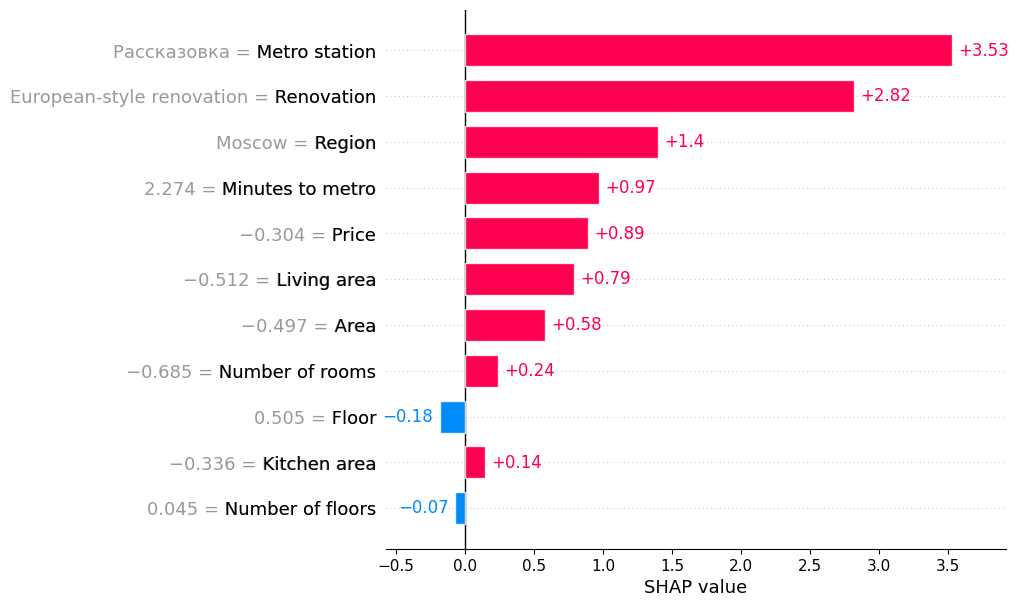

In [73]:
df_shap_values = tree_explainer(X_cat_train_cb)
shap_bp = shap.plots.bar(df_shap_values[0], max_display=X_cat_train_cb.shape[1])

   - Построить график `shap.plots.waterfall` для одного объекта выборки.

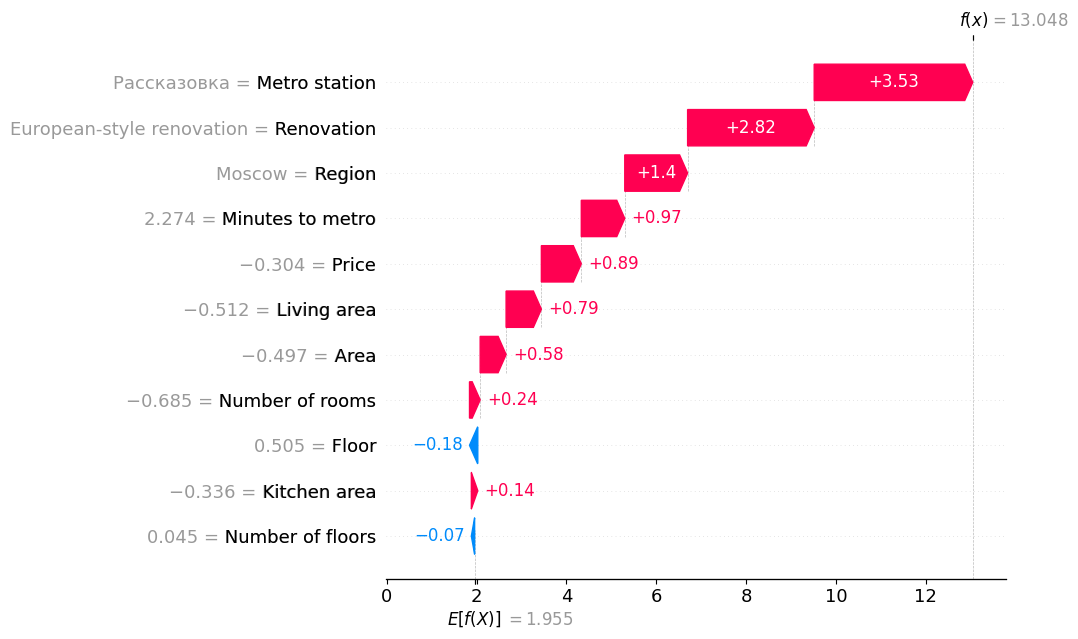

In [75]:
shap.plots.waterfall(df_shap_values[0], max_display=X_cat_train_cb.shape[1])

   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.

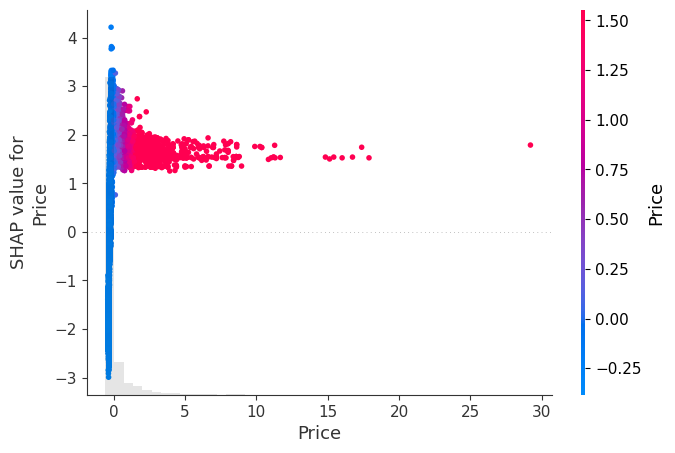

In [77]:
shap.plots.scatter(df_shap_values[:, "Price"], color=df_shap_values[:, "Price"])

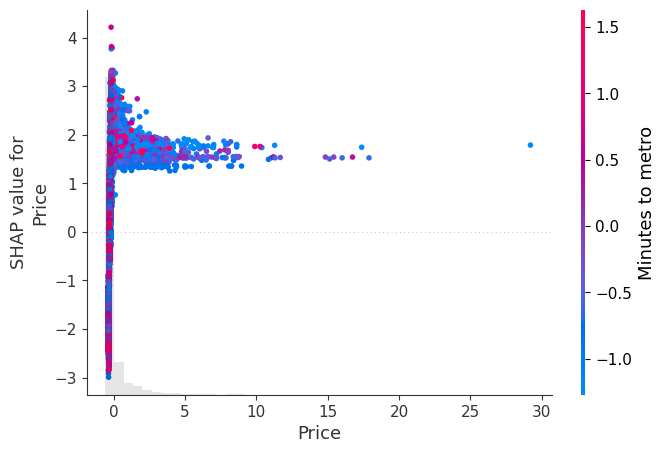

In [78]:
shap.plots.scatter(df_shap_values[:, "Price"], color=df_shap_values[:, "Minutes to metro"])

   - Построить график `shap.plots.beeswarm` для всех признаков.

<Axes: xlabel='SHAP value (impact on model output)'>

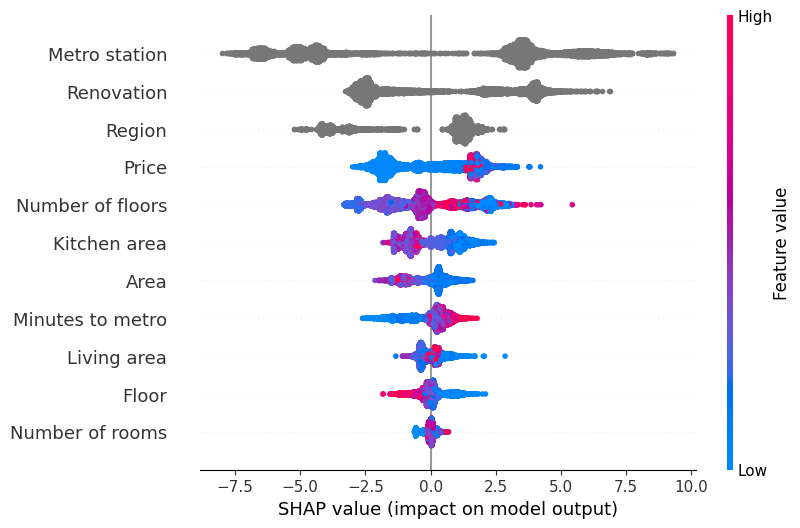

In [79]:
shap.plots.beeswarm(df_shap_values, max_display=X_cat_train_cb.shape[1], show=False)

   - Построить график `shap.plots.bar` для всех признаков.

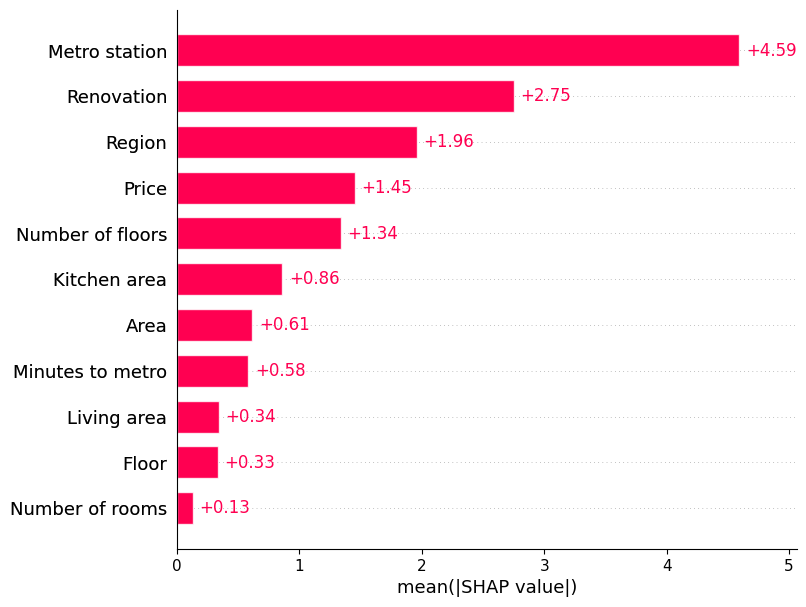

In [80]:
shap_bp = shap.plots.bar(df_shap_values, max_display=X_cat_train_cb.shape[1])

   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.

Оставим признаки, у которых среднее значение SHAP больше 1

In [32]:
filter_cols = ['Metro station', 'Renovation', 'Region', 'Price', 'Number of floors']

In [83]:
best.fit(X_cat_train_cb[filter_cols], y_train, cat_features=['Metro station', 'Renovation', 'Region'])

   - Сравнить метрики до и после фильтрации.

In [84]:
y_pred = best.predict(X_cat_test_cb[filter_cols])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

New building       1.00      1.00      1.00      2832
   Secondary       1.00      1.00      1.00      3971

    accuracy                           1.00      6803
   macro avg       1.00      1.00      1.00      6803
weighted avg       1.00      1.00      1.00      6803



Метрики остались идеальными

   - Визуализировать полученное дерево решений.

In [93]:
best.plot_tree(tree_idx=0, pool=Pool(data=X_cat_train_cb[filter_cols], label=y_train, cat_features=['Metro station', 'Renovation', 'Region']))

5. Регрессия:
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.
   - Сравнить метрики до и после фильтрации.

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.

In [16]:
from catboost import CatBoostRegressor

In [21]:
target_train = X_cat_train_cb['Price']
X_train_regr = pd.concat([X_cat_train_cb.drop(['Price'], axis=1), y_train], axis=1)
X_train_regr['Apartment type'] = pd.Categorical(X_train_regr['Apartment type'])

target_test = X_cat_test_cb['Price']
X_test_regr = pd.concat([X_cat_test_cb.drop(['Price'], axis=1), y_test], axis=1)
X_test_regr['Apartment type'] = pd.Categorical(X_test_regr['Apartment type'])

In [22]:
cat_model = CatBoostRegressor(random_state=0, task_type='GPU', logging_level='Silent')

cat_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'task_type': ['GPU'],
    'early_stopping_rounds': [10]
}

cat_cols = [var for var in X_train_regr.columns if X_train_regr[var].dtype == 'category']

train_data_cat_cb = Pool(data=X_train_regr, label=target_train, cat_features=cat_cols)
test_data_cat_cb = Pool(data=X_test_regr, label=target_test, cat_features=cat_cols)

cat_grid_search_result = cat_model.grid_search(cat_grid, train_data_cat_cb, cv=5, train_size=0.9375, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.

In [23]:
cat_grid_search_result

{'params': {'task_type': 'GPU',
  'depth': 10,
  'od_wait': 10,
  'learning_rate': 0.5,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26],
              'test-RMSE-mean': [0.7109634216147809,
               0.5988569189895746,
               0.5469004373609383,
               0.5298236444750923,
               0.5233235901217678,
               0.5198094592509069,
               0.5169653119597365,
               0.5221950492508497,
               0.5193474933271289,
      

In [26]:
best = CatBoostRegressor(task_type='GPU', depth=10, learning_rate=0.5, iterations=500, logging_level='Silent')

In [27]:
best.fit(X_train_regr, target_train, cat_features=cat_cols)

In [29]:
y_pred = best.predict(X_test_regr)

In [30]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2

In [31]:
print(f"Средняя квадратичная ошибка (MSE): {MSE(target_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(target_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(target_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 0.221
Средняя абсолютная ошибка (MAE): 0.131
Коэффициент детерминации (R2 score): 0.774


   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.

In [35]:
filter_cols = ['Metro station', 'Renovation', 'Region', 'Number of floors']

In [36]:
best.fit(X_train_regr[filter_cols], target_train, cat_features=['Metro station', 'Renovation', 'Region'])

   - Сравнить метрики до и после фильтрации.

In [37]:
y_pred = best.predict(X_test_regr[filter_cols])
print(f"Средняя квадратичная ошибка (MSE): {MSE(target_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(target_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(target_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 0.512
Средняя абсолютная ошибка (MAE): 0.257
Коэффициент детерминации (R2 score): 0.477


Метрики стали гораздо хуже